In [10]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2025-03-31 17:55:47.207777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-31 17:55:47.227296: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-31 17:55:47.233053: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 17:55:47.254957: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.17.0
Notebook last run (end-to-end): 2025-03-31 17:55:49.506708


Create Data

In [11]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [12]:
#Check out the feature
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [13]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [14]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


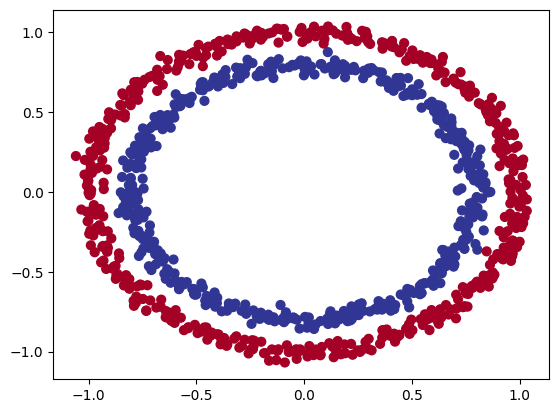

In [15]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=40)

In [16]:
#check the shape of the data
X.shape, y.shape

((1000, 2), (1000,))

In [17]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [18]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Steps in modeling

In [19]:
#set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(X, y, epochs=5)

I0000 00:00:1743443749.804324  183073 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743443749.957986  183073 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743443749.958053  183073 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743443749.974300  183073 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743443749.974362  183073 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/5


''+ptx85' is not a recognized feature for this target (ignoring feature)
+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
''+ptx85' is not a recognized feature for this target+ptx85 (ignoring feature)
' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
''+ptx85' is not a recognized feature for this target+ptx85 (ignoring feature)
' is not a recognized feature for this target (ignoring f

32/32 [==============================] - 2s 5ms/step - loss: 4.3154 - accuracy: 0.4630
Epoch 2/5
 1/32 [..............................] - ETA: 0s - loss: 4.3490 - accuracy: 0.4688

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


32/32 [==============================] - 0s 5ms/step - loss: 4.2843 - accuracy: 0.4620
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 4.2449 - accuracy: 0.4620
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 4.2172 - accuracy: 0.4640
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 4.2107 - accuracy: 0.4690


In [20]:
#Poor performance acc-50% means basically guessing
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4950


[0.6931594610214233, 0.4950000047683716]

In [21]:
#set random seed
tf.random.set_seed(42)

#Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_2 = model_2.fit(X, y, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


In [22]:
#Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 3.5044 - accuracy: 0.4740


[3.5043985843658447, 0.4740000069141388]

    Improving model

In [23]:
#set random seed
tf.random.set_seed(42)

#Create model 3 layers 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_3 = model_3.fit(X, y, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

In [39]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # create X values we are going to make predictions on
  x_in = np.c_[xx.ravel(), yy.ravel()] 

  #MAke predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if model.output_shape[-1] > 1:
    # If so, find the class with the highest probability
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(np.max(y_pred,axis=1)).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=40)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


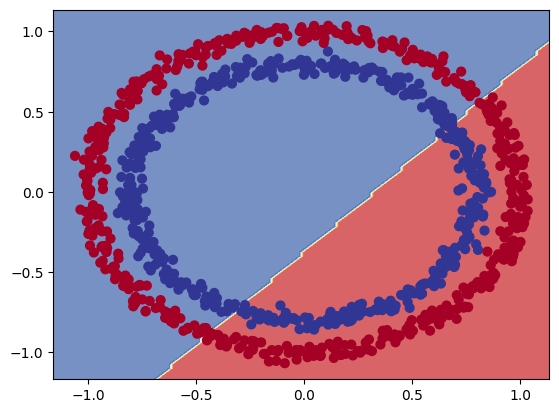

In [40]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

This model works for line problems, lets check it in regression case

In [41]:
#set random seed
tf.random.set_seed(42)

#create regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

#Split the data into training and test sets
X_reg_train = X_regression[:150]
y_reg_train = y_regression[:150]
X_reg_test = X_regression[150:]
y_reg_test = y_regression[150:]

Fit model to regression data

In [42]:
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1398, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1381, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1370, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1147, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [43]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model was compiled for binary problems, lest change it

In [44]:
#Replicate model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


5/5 [==============================] - 1s 5ms/step - loss: 436.9951 - mae: 436.9951
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 357.6219 - mae: 357.6219
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 280.3108 - mae: 280.3108
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 198.9496 - mae: 198.9496
Epoch 5/100
1/5 [=====>........................] - ETA: 0s - loss: 148.6303 - mae: 148.6303

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


5/5 [==============================] - 0s 5ms/step - loss: 112.5932 - mae: 112.5932
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 47.8814 - mae: 47.8814
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 69.0353 - mae: 69.0353
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 63.4213 - mae: 63.4213
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 46.0765 - mae: 46.0765
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 47.8926 - mae: 47.8926
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 43.9381 - mae: 43.9381
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 43.6442 - mae: 43.6442
Epoch 13/100
5/5 [==============================] - 0s 5ms/step - loss: 44.7185 - mae: 44.7185
Epoch 14/100
5/5 [==============================] - 0s 5ms/step - loss: 41.7526 - mae: 41.7526
Epoch 15/100
5/5 [==============================] - 0s 6ms/step -

Visualize the model

2/2 [==============================] - 0s 2ms/step


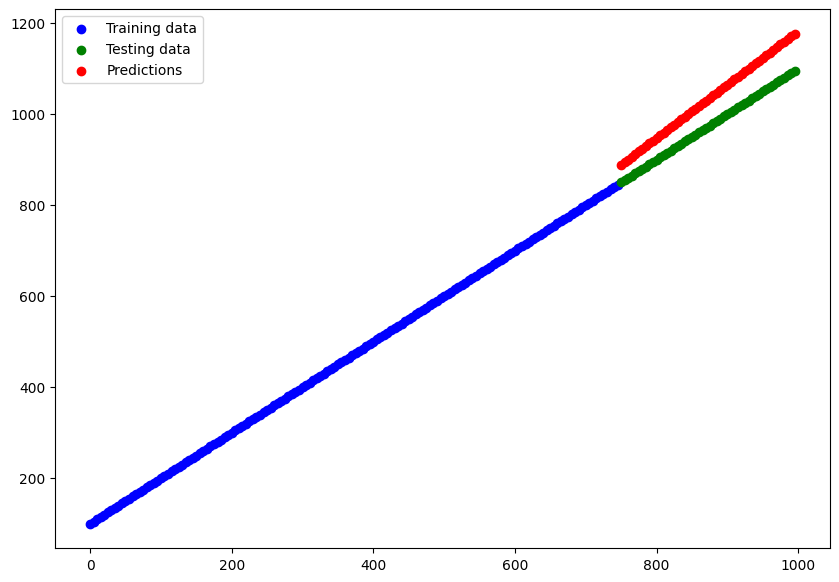

In [46]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

Non linearity!!

In [47]:
#set random seed
tf.random.set_seed(42)

#Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(1) #output layer
])

#Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#Fit the model
history_4 = model_4.fit(X, y, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


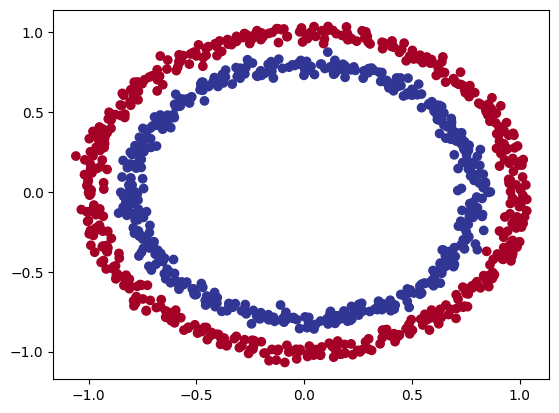

In [48]:
#Check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
#Check the models decision boundary
plot_decision_boundary(model_4, X, y)